# Figure generation

In [26]:
# clone repository 
#!git clone https://github.com/mtcarilli/GCCP_2022.git

In [2]:
#!pip install numdifftools

In [2]:
# clone and install color palette
!git clone https://github.com/BlakeRMills/MetBrewer.git
!pip install ./MetBrewer/Python

Cloning into 'MetBrewer'...
remote: Enumerating objects: 634, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 634 (delta 127), reused 116 (delta 79), pack-reused 452
Receiving objects: 100% (634/634), 154.98 MiB | 31.83 MiB/s, done.
Resolving deltas: 100% (299/299), done.
Processing ./MetBrewer/Python
  Created wheel for met-brewer: filename=met_brewer-1.0-py3-none-any.whl size=5899 sha256=4bd6d2d43ada2a6b5adc17ae5e2f5006338ccbae27535a0a50725cf2d0322ecf
  Stored in directory: /tmp/pip-ephem-wheel-cache-e9y8s2rd/wheels/db/d8/7a/4121eca6ccebe0f8cd8e47afdaf69d037db4c46f06c3bbf482
Successfully built met-brewer


In [1]:
import numpy as np
import pandas as pd
from torchsummary import summary
import scipy
from scipy import stats
import time



import sys,os
sys.path.append('../psKWR/')
sys.path.append('../monod/src/')
sys.path.append('../monod/src/monod/')

# monod
from monod import cme_toolbox 
from nn_toolbox import get_moments, get_conditional_moments, get_quantile_moments, get_NORM

import monod



sys.path.append('../')
import ypred_module as ypm
import direct_module as direct # need for direct
import train_conditional as train

# plotting
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams
from matplotlib import ticker
rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 27,'font.family': 'Arial'})


import seaborn as sns
sns.set_theme(style = "white", font_scale= 1.6)

import met_brewer
from met_brewer import met_brew

In [2]:
# a e s t h e t i c s
fs = 22
n = 123

In [5]:

# set up monod models 
fitmodel_qv = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='quad_vec')
fitmodel_fq = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='fixed_quad')
fitmodel_KWR = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='nn_10')
fitmodel_psKWR = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='nn_microstate')

-----

# Figure 1: Approximation Overview


### Figure 2: Conditional distributions

Plotting for 5 kernel functions for ease of visualization. 

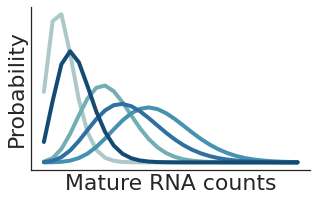

In [6]:
k = np.arange(0,30)

# can play around with the values for different shapes
ns = [20,30,30,15,15,20]
ps = [0.9,0.8,0.7,0.6,0.8,0.9]

fig1,ax1 = plt.subplots(1,1,figsize=(5,3))

colors = ("#abc9c8", "#72aeb6", "#4692b0", "#2f70a1", "#134b73", "#0a3351")
for i in range(5):
    P = scipy.stats.nbinom.pmf(k, ns[i], ps[i], loc=0)
    plt.plot(P,'-',c=colors[i],linewidth=4)

plt.xticks([])
plt.yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.xlabel('Mature RNA counts',fontsize=fs)
plt.ylabel('Probability',fontsize=fs)

plt.savefig('./kernels.png',dpi=450)

### Figure 2: Conditional

Use the Approximation for 2b.

In [7]:
# met_brew(name="Greek", n=n, brew_type="continuous").reverse()

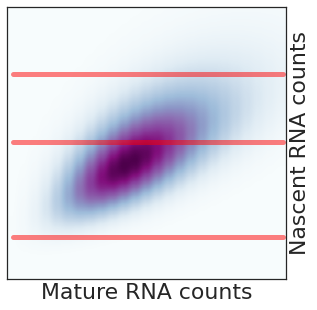

In [8]:
p_vec = np.log10(np.array([10,.1,.8]))

# cmap=LinearSegmentedColormap.from_list('cm', met_brew(name="Peru2", n=n, brew_type="continuous"), N=n)
# cmap='Wistia'
# cmap='summer'
# cmap=LinearSegmentedColormap.from_list('cm', met_brew(name="VanGogh3", n=n, brew_type="continuous")[::-1], N=n)
# cmap='magma'
# cmap='cool'
cmap = matplotlib.colormaps['BuPu']

true = fitmodel_qv.eval_model_pss(p_vec,limits=[1000,500])
pred = fitmodel_KWR.eval_model_pss(p_vec,limits=[200,25])[:200,:25]


fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

vmax = np.max(pred.flatten())
vmin = np.min(pred.flatten())



ax1.imshow(pred,aspect='auto',vmin=vmin,vmax=vmax,cmap=cmap)
ax1.invert_yaxis()
ax1.yaxis.set_label_position("right")

ax1.set_xlabel('Mature RNA counts',fontsize=fs)
ax1.set_ylabel('Nascent RNA counts',fontsize=fs)

desired_conditionals = [30,100,150]
for i in range(len(desired_conditionals)):
    plt.plot([0,pred.shape[1]-0.8],[desired_conditionals[i]]*2,alpha=0.5,linewidth=5,color='red')

ax1.set_xticks([])
ax1.set_yticks([])
plt.savefig('./approx_pmf.png',dpi=450)

### Conditionals for plots in 2c

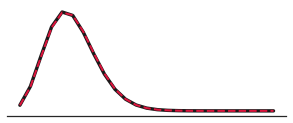

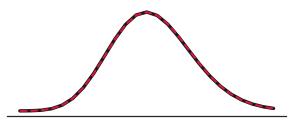

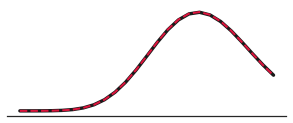

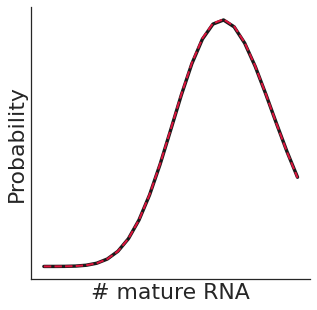

In [9]:
i=0
# lw=
for cond in desired_conditionals:
    fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,2))
    plt.plot(true[cond,:pred.shape[1]],'k-',label='True PMF',linewidth=3.4)
    plt.plot(pred[cond,:],color='crimson',label='Approximated PMF',linewidth=2,linestyle='--')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # plt.xlabel('# mature RNA')
    # plt.ylabel('Probability')
    plt.savefig('./cond{:.0f}.png'.format(i),dpi=450)
    i+=1
    # # plt.title(f'P (m | n = {cond})',fontsize=20)
    # plt.legend()
fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
plt.plot(true[cond,:pred.shape[1]],'k-',label='True PMF',linewidth=3.4)
plt.plot(pred[cond,:],color='crimson',label='Approximated PMF',linewidth=2,linestyle='--')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(True)

plt.xlabel('# mature RNA',fontsize=fs)
plt.ylabel('Probability',fontsize=fs)
plt.savefig('./condbig{:.0f}.png'.format(i),dpi=450)


In [ ]:
#!zip  figs.zip ./figs/* 

-----
# Figure 2 : Performance



### Figure 2a: Time vs. Hellinger Distance 
Plotting timing vs. hellinger distance (normalized by state size of PMF) for various methods of calculating and approximating full Probability Mass Functions.

In [39]:
import pickle

In [129]:
with open('./new_hellinger_dict_1std','rb') as file:
    hellinger_dict = pickle.load(file)
with open('./new_timing_dict_1std','rb') as file:
    timing_dict = pickle.load(file)
with open('./new_microstate_timing_dict', 'rb') as file:
    microstate_timing_dict = pickle.load(file)

EPS = 10**(-12.2)
hellinger_dict['QV20'] = { 'norm' : np.zeros(256), 'unnorm' : np.zeros(256)} 

In [130]:
methods = ['QV20','QV10','QV4','QV1','DR','MMNB','KWR','psKWR']

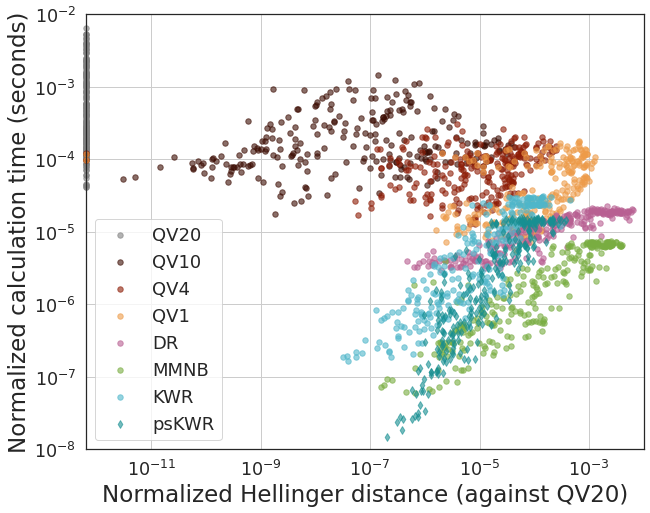

In [131]:
norm_unnorm = 'norm'

fs = 23
fig, ax = plt.subplots(figsize=(10, 8))
cmap_quad = ("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d") #greek
cmap_ml = ( "#b86092", "#79ad41", "#4fb6ca", "#178f92", "#d7aca1") # austria, isfahan1 and isfahan2

color_dict = {
    'QV20' : 'gray',
    'QV10' : "#3c0d03",
    'QV4' : "#8d1c06",
#     'QV1' : "#e67424", 
    'QV1' : "#ed9b49",
    'DR' : "#b86092",
    'MMNB' : "#79ad41",
    'KWR' : "#4fb6ca",
    'psKWR' : "#178f92",
    'DR*' : "#b86092",
    'MMNB*' : "#79ad41",
    'KWR*' : "#4fb6ca",
    'psKWR*' : "#178f92",
#     'psKWR' : 'darkblue'
}

#ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

alpha=0.6

for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(hellinger_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

plt.xlabel('Normalized Hellinger distance (against QV20)',fontsize=fs)
plt.ylabel('Normalized calculation time (seconds)',fontsize=fs)
# plt.title("Timing vs. Hellinger Distance over Grid", fontdict={'fontsize': 20})
plt.grid()
plt.legend(fontsize=18,loc='lower left')
plt.yscale('log')
plt.xscale('log')
xl = np.asarray([-12.2,-2],dtype=float)
yl = np.asarray([-8,-2],dtype=float)
plt.xlim(10**xl)
plt.ylim(10**yl)
plt.savefig('./time_hellinger_scatter.png',dpi=450,bbox_inches='tight');

## Supplement: KLD

In [132]:
with open('./new_kld_dict_1std','rb') as file:
    kld_dict = pickle.load(file)

EPS = 10**(-12.2)

In [133]:
methods = ['QV10','QV4','QV1','DR','MMNB','KWR','psKWR']

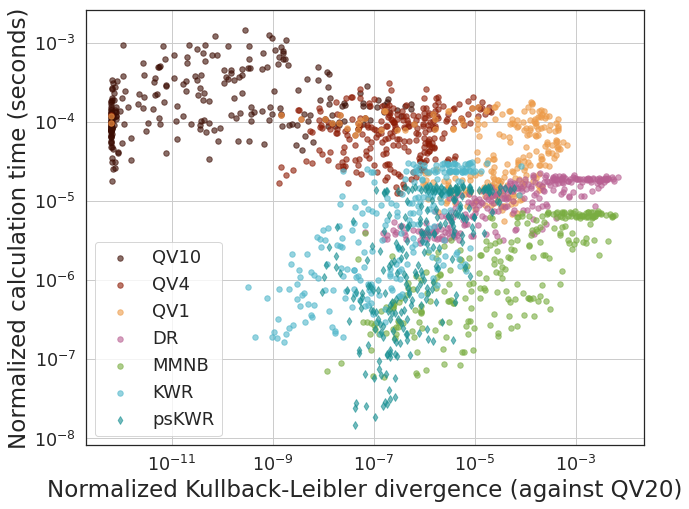

In [134]:
norm_unnorm = 'norm'


fs = 23
fig, ax = plt.subplots(figsize=(10, 8))
cmap_quad = ("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d") #greek
cmap_ml = ( "#b86092", "#79ad41", "#4fb6ca", "#178f92", "#d7aca1") # austria, isfahan1 and isfahan2

color_dict = {
    'QV20' : 'gray',
    'QV10' : "#3c0d03",
    'QV4' : "#8d1c06",
#     'QV1' : "#e67424", 
    'QV1' : "#ed9b49",
    'DR' : "#b86092",
    'MMNB' : "#79ad41",
    'KWR' : "#4fb6ca",
    'psKWR' : "#178f92",
    'DR*' : "#b86092",
    'MMNB*' : "#79ad41",
    'KWR*' : "#4fb6ca",
    'psKWR*' : "#178f92",
#     'psKWR' : 'darkblue'
}

#ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

alpha=0.6

for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(kld_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

plt.xlabel('Normalized Kullback-Leibler divergence (against QV20)',fontsize=fs)
plt.ylabel('Normalized calculation time (seconds)',fontsize=fs)
# plt.title("Timing vs. Hellinger Distance over Grid", fontdict={'fontsize': 20})
plt.grid()
plt.legend(fontsize=18,loc='lower left')
plt.yscale('log')
plt.xscale('log')
xl = np.asarray([-12.2,-2],dtype=float)
yl = np.asarray([-7.6,-2.5],dtype=float)
# plt.xlim(10**xl)
# plt.ylim(10**yl)
plt.savefig('./time_kld_scatter.png',dpi=450,bbox_inches='tight');

In [135]:
# print(np.mean(compare_array_norm_hellinger[2,:,1]))
# print(np.mean(compare_array_norm_hellinger[6,:,0]))

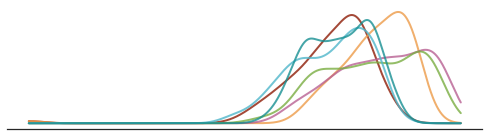

In [116]:
# hellinger KDE 
fig, ax = plt.subplots(figsize=(6.9, 2))

x_ = np.linspace(xl[0],xl[1],2000)
alpha = 0.8
for i,method in enumerate(methods[1:]):
    
    h_ = hellinger_dict[method][norm_unnorm]
    h_[h_==0] = EPS
    kde = scipy.stats.gaussian_kde(np.log10(h_))
    plt.plot(x_,kde(x_),color=color_dict[method],linewidth=2,alpha=alpha)

plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('./hellinger_kde.png',dpi=450,bbox_inches='tight')

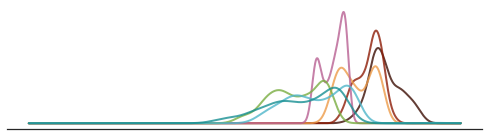

In [117]:
fig, ax = plt.subplots(figsize=(6.9, 2))

# timing KDE 
x_ = np.linspace(xl[0],xl[1],2000)
alpha = 0.8
for i,method in enumerate(methods):
    kde = scipy.stats.gaussian_kde(np.log10(timing_dict[method][norm_unnorm]))
    plt.plot(x_,kde(x_),color=color_dict[method],linewidth=2,alpha=alpha)

plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('./time_kde.png',dpi=450,bbox_inches = "tight")

### Figure 2b: Unnormalized Timing Over Grid

For 256 parameters! Not normalized. 



In [118]:
sum(hellinger_dict['psKWR']['norm']==1.0)

0

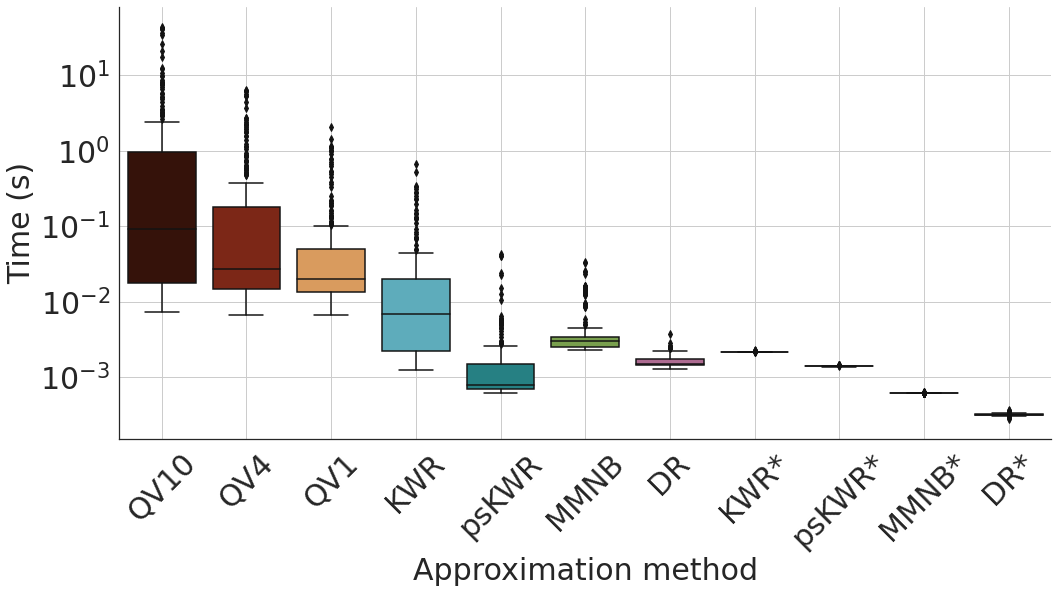

In [136]:
unnorm = 'unnorm'
unnorm_time_data = {'Approximation Method': 
                    ['QV10']*256 + ['QV4']*256 + ['QV1']*256 +
                    ['KWR']*256+['psKWR']*256 +
                    ['MMNB']*256+['DR']*256 + 
                    ['KWR*']*256+['psKWR*']*256+
                    ['MMNB*']*256+['DR*']*256,
                  
        'Time (s)': np.concatenate((timing_dict['QV10'][unnorm].flatten(),
                              timing_dict['QV4'][unnorm].flatten(),
                              timing_dict['QV1'][unnorm].flatten(),
                              timing_dict['DR'][unnorm].flatten(),
                              timing_dict['MMNB'][unnorm].flatten(),
                              timing_dict['KWR'][unnorm].flatten(),
                              timing_dict['psKWR'][unnorm].flatten(),
                              microstate_timing_dict['KWR'].flatten(),
                              microstate_timing_dict['psKWR'].flatten(),
                              microstate_timing_dict['MMNB'].flatten(),
                              microstate_timing_dict['DR'].flatten()))}

unnorm_time_df = pd.DataFrame.from_dict(unnorm_time_data) 


g = sns.catplot(x="Approximation Method", 
                y='Time (s)',kind="box",   
                data=unnorm_time_df,palette=color_dict,
                height=7, aspect=14/7)

g.set(yscale="log")
plt.grid()
plt.ylabel('Time (s)',fontsize=30)
plt.xlabel('Approximation method',fontsize=30)
g.set_xticklabels(rotation = 45,fontsize=30)
# g.set_yticklabels(fontsize=30)
# plt.title('Time over grid',fontsize=19);
plt.yticks(fontsize=30)
plt.savefig('./time_unnorm_box.png',dpi=450,bbox_inches='tight');

Average normalized Hellinger distances and runtimes over 256 parameters.

In [137]:
QV20_mean_hell= np.mean(hellinger_dict['QV20']['norm'])
QV20_mean_time = np.mean(timing_dict['QV20']['norm'])
print(f'Hellinger distance for QV20: {QV20_mean_hell} and timing: {QV20_mean_time}')


QV10_mean_hell= np.mean(hellinger_dict['QV10']['norm'])
QV10_mean_time = np.mean(timing_dict['QV10']['norm'])
print(f'Hellinger distance for QV10: {QV10_mean_hell} and timing: {QV10_mean_time}')


QV4_mean_hell= np.mean(hellinger_dict['QV4']['norm'])
QV4_mean_time = np.mean(timing_dict['QV4']['norm'])
print(f'Hellinger distance for QV4: {QV4_mean_hell} and timing: {QV4_mean_time}')

QV1_mean_hell= np.mean(hellinger_dict['QV1']['norm'])
QV1_mean_time = np.mean(timing_dict['QV1']['norm'])
print(f'Hellinger distance for QV1: {QV1_mean_hell} and timing: {QV1_mean_time}')


KWR_mean_hell= np.mean(hellinger_dict['KWR']['norm'])
KWR_mean_time = np.mean(timing_dict['KWR']['norm'])
print(f'Hellinger distance for KWR: {KWR_mean_hell} and timing: {KWR_mean_time}')

psKWR_mean_hell= np.mean(hellinger_dict['psKWR']['norm'])
psKWR_mean_time = np.mean(timing_dict['psKWR']['norm'])
print(f'Hellinger distance for psKWR: {psKWR_mean_hell} and timing: {psKWR_mean_time}')

Hellinger distance for QV20: 0.0 and timing: 0.0008349950901620682
Hellinger distance for QV10: 2.30871955452124e-06 and timing: 0.00024521226930224107
Hellinger distance for QV4: 3.0848274410592705e-05 and timing: 8.689680110929413e-05
Hellinger distance for QV1: 0.0002636580710963961 and timing: 5.389492307715853e-05
Hellinger distance for KWR: 3.3696730502262315e-05 and timing: 9.868853075152306e-06
Hellinger distance for psKWR: 4.469195304880431e-05 and timing: 5.295977243047461e-06


In [138]:
np.mean(timing_dict['KWR']['unnorm']),np.mean(timing_dict['psKWR']['unnorm'])

(0.004581747576594353, 0.0016326066106557846)

## Hellinger distance

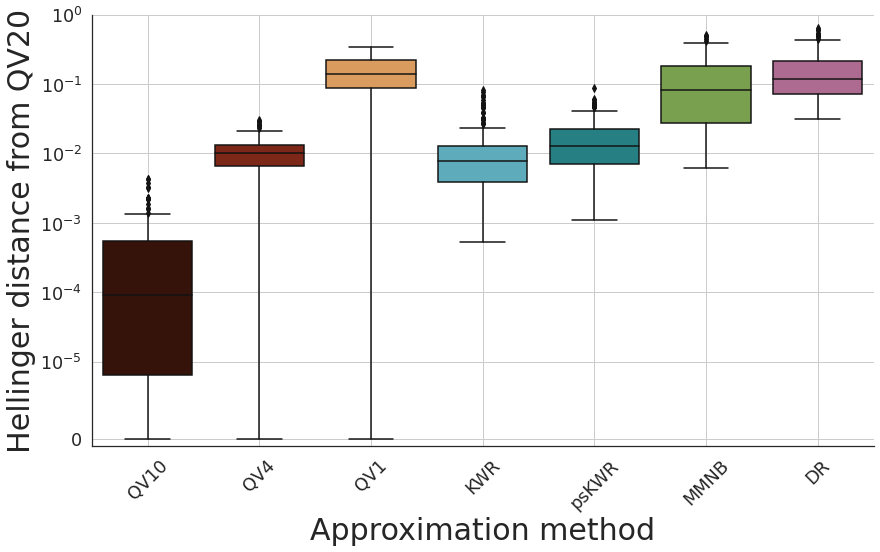

In [139]:
unnorm = 'unnorm'
unnorm_hell_data = {'Approximation Method': ['QV10']*256+ ['QV4']*256 + ['QV1']*256 +
                    ['KWR']*256+['psKWR']*256+
                    ['MMNB']*256+['DR']*256,
                  
        'Hellinger distance': np.concatenate((
                                    hellinger_dict['QV10'][unnorm].flatten(),
                                    hellinger_dict['QV4'][unnorm].flatten(),
                                    hellinger_dict['QV1'][unnorm].flatten(),
                                    hellinger_dict['KWR'][unnorm].flatten(),
                                    hellinger_dict['psKWR'][unnorm].flatten(),
                                    hellinger_dict['MMNB'][unnorm].flatten(),
                                    hellinger_dict['DR'][unnorm].flatten(),
                                   )) }
unnorm_time_df = pd.DataFrame.from_dict(unnorm_hell_data) 


g = sns.catplot(x="Approximation Method", 
                y='Hellinger distance',kind="box",   
                data=unnorm_time_df,palette=color_dict,
                height=7, aspect=12/7)

plt.yscale("symlog",linthresh=1e-5)
plt.grid()
plt.ylim(-1e-6,1e0)
plt.ylabel('Hellinger distance from QV20',fontsize=30)
plt.xlabel('Approximation method',fontsize=30)
g.set_xticklabels(rotation = 45);
# plt.title('Time over grid',fontsize=19);
plt.savefig('./hell_unnorm_box.png',dpi=450,bbox_inches='tight')

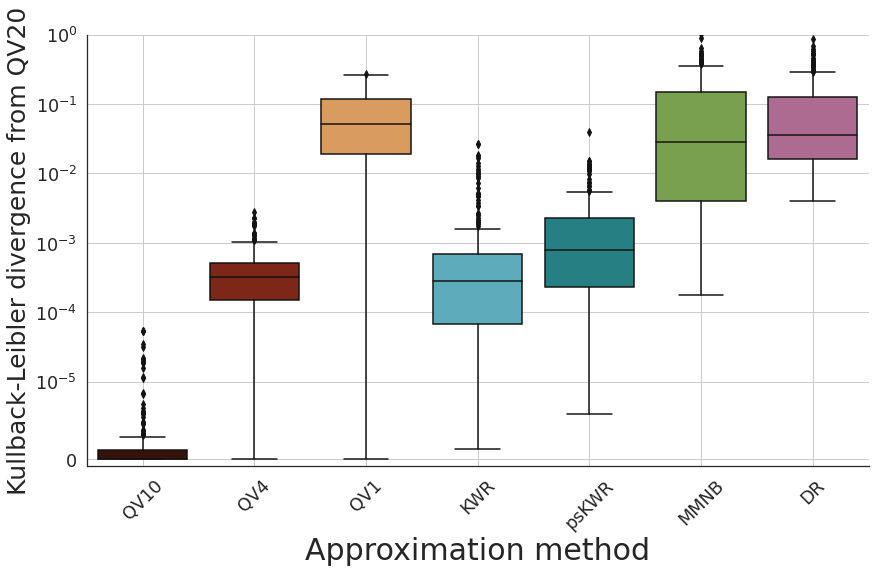

In [140]:
unnorm = 'unnorm'
unnorm_kld_data = {'Approximation Method': ['QV10']*256+ ['QV4']*256 + ['QV1']*256 +
                    ['KWR']*256+['psKWR']*256+
                    ['MMNB']*256+['DR']*256,
                  
        'Kullback-Leibler divergence': np.concatenate((
                                    kld_dict['QV10'][unnorm].flatten(),
                                    kld_dict['QV4'][unnorm].flatten(),
                                    kld_dict['QV1'][unnorm].flatten(),
                                    kld_dict['KWR'][unnorm].flatten(),
                                    kld_dict['psKWR'][unnorm].flatten(),
                                    kld_dict['MMNB'][unnorm].flatten(),
                                    kld_dict['DR'][unnorm].flatten(),
                                   )) }
unnorm_kld_df = pd.DataFrame.from_dict(unnorm_kld_data) 


g = sns.catplot(x="Approximation Method", 
                y='Kullback-Leibler divergence',kind="box",   
                data=unnorm_kld_df,palette=color_dict,
                height=7, aspect=12/7)

plt.yscale("symlog",linthresh=1e-5)
plt.grid()
plt.ylim(-1e-6,1e0)
plt.ylabel('Kullback-Leibler divergence from QV20',fontsize=25)
plt.xlabel('Approximation method',fontsize=30)
g.set_xticklabels(rotation = 45);
# plt.title('Time over grid',fontsize=19);
plt.savefig('./kld_unnorm_box.png',dpi=450,bbox_inches='tight')

## Microstate timing 



In [141]:
# with open('./new_microstate_timing_dict', 'rb') as file:
#     microstate_timing_dict = pickle.load(file)

In [142]:
# microstate_time_data = {'Approximation Method': ['QV10']*256+ ['QV4']*256 + ['QV1']*256 +
#                     ['KWR']*256+['psKWR']*256+
#                     ['MMNB']*256+['DR']*256,
                  
#         'Time over grid (s)': np.concatenate((
#                                      timing_dict['QV10'][unnorm].flatten(),
#                                      timing_dict['QV4'][unnorm].flatten(),
#                                      timing_dict['QV1'][unnorm].flatten(),
#                                      microstate_timing_dict['KWR'].flatten(),
#                                      microstate_timing_dict['psKWR'].flatten(),
#                                      microstate_timing_dict['MMNB'].flatten(),
#                                      microstate_timing_dict['DR'].flatten(),
#                                    )) }
# microstate_time_df = pd.DataFrame.from_dict(microstate_time_data) 


# g = sns.catplot(x="Approximation Method", 
#                 y='Time over grid (s)',kind="box",   
#                 data=microstate_time_df,palette=color_dict,
#                 height=7, aspect=12/7)

# g.set(yscale="log")
# plt.grid()

# plt.xlabel('Approximation Method',fontsize=30)
# plt.ylabel('Microstate timing (s)',fontsize=30);
# plt.title('Time over grid',fontsize=19);
# plt.savefig('./figs/time_unnorm_box.png',dpi=450)

In [143]:
# NN_times_onepoint = np.load('./results/NN_times_onepoint.npy')
# NN_times_onepoint_1NB = np.load('./results/NN_times_onepoint_1NB.npy')
# NB_times_onepoint = np.load('./results/NB_times_onepoint.npy')
# direct_times_onepoint = np.load('./results/direct_model256_3_4t_times_onepoint.npy')
# np.mean(NN_times_onepoint)
# #np.mean(compare_array_unnorm_hellinger[4,:,0].flatten())
# np.mean(NN_times_onepoint_1NB)

### Figure 2d: Comparing PMFs

In [144]:
import monod

In [65]:
data_array = train.load_data(3,'../data/KWR_data/','256_test_full')

getting prob joint


/home/tara/temp_git2/GCCP_2022/figs/../ypred_module.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  index = torch.tensor(m_range+1,dtype=torch.long)
/home/tara/temp_git2/GCCP_2022/figs/../ypred_module.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MU, VAR, STD, xmax = [torch.tensor(x) for x in train.get_moments(p)]


getting prob joint
getting prob joint


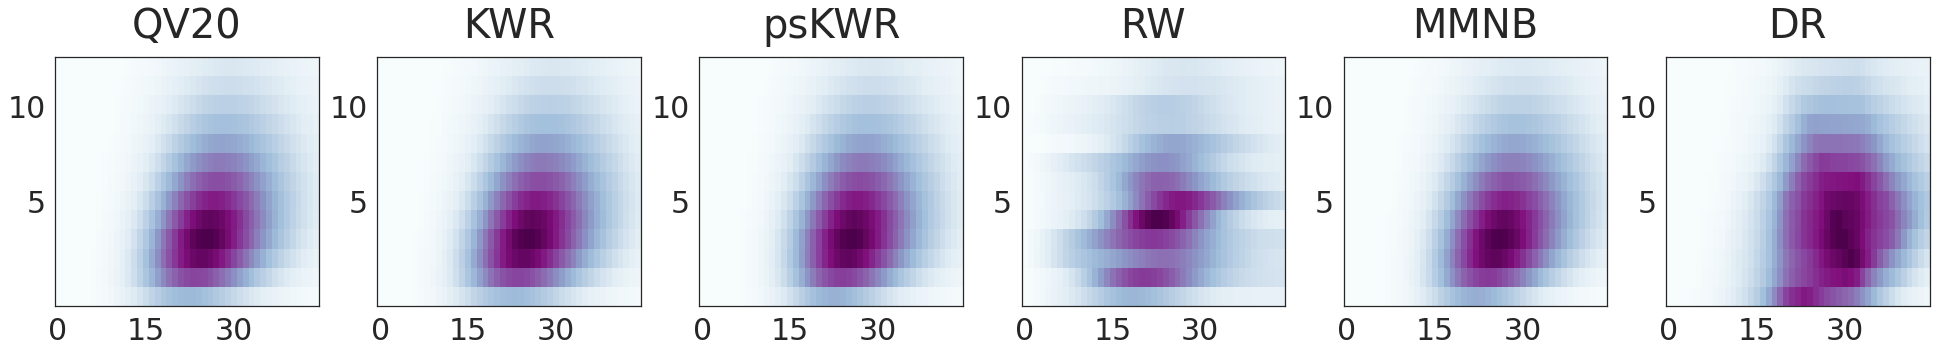

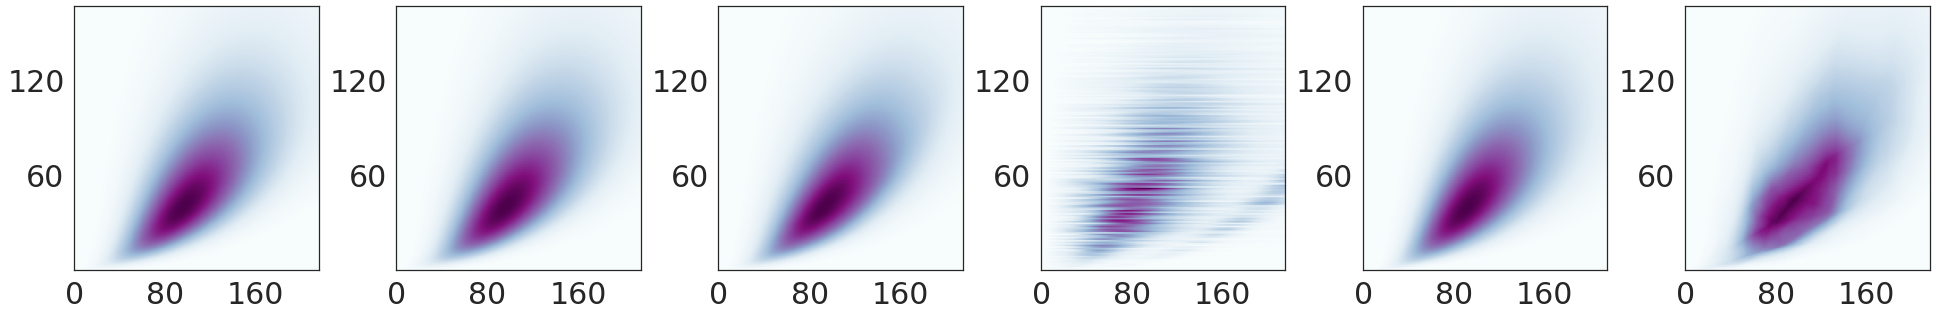

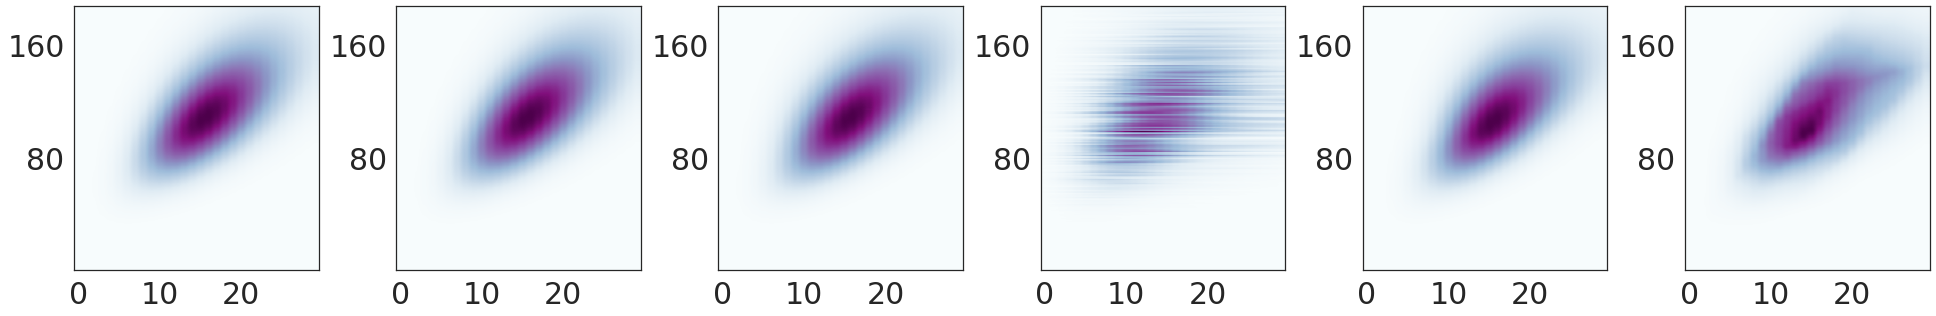

In [66]:
# indices = [8,11,22,20]
indices = [8,22,11]

num_columns = 6
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

for index,i in enumerate(indices):
    

    
    p_ = data_array[i][0]
    
    mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p_[0],10**p_[1],10**p_[2])
    lim_large = [int(np.ceil(mu_n+20*std_n)),int(np.ceil(mu_m+20*std_m))]
    lim_ = [int(np.ceil(mu_n+2*std_n)),int(np.ceil(mu_m+2*std_m))]

    qv20_pmf = fitmodel_qv.eval_model_pss(p_,limits=lim_large)
    qv_pmf = fitmodel_qv.eval_model_pss(p_,limits=lim_)
    nas_range = np.arange(lim_[0])
    mat_range = np.arange(lim_[1])

    kwr_pmf = fitmodel_KWR.eval_model_pss(p_,lim_)
    psKWR_pmf = fitmodel_psKWR.eval_model_pss(p_,lim_)
    rw_pmf = ypm.get_prob(p_,nas_range,mat_range,rand_weights=True)
    dr_pmf = direct.predict_pmf(p_,lim_[0],lim_[1])
    N,M = np.meshgrid(range(lim_[0]),range(lim_[1]),indexing='ij')
    mmnb_pmf = ypm.approximate_conditional_tensorval(p_,N,M).detach().numpy()
    
    
    
    if index == 0:
        fig1,ax1=plt.subplots(nrows=1,ncols=num_columns,figsize=(4.5*num_columns,5))
        ax1[0].set_title('QV20',fontsize=40)
        ax1[1].set_title('KWR',fontsize=40)
        ax1[2].set_title('psKWR',fontsize=40)
        ax1[3].set_title('RW',fontsize=40)
        ax1[4].set_title('MMNB',fontsize=40)
        ax1[5].set_title('DR',fontsize=40)
    
        
    else:
        fig1,ax1=plt.subplots(nrows=1,ncols=num_columns,figsize=(4.5*num_columns,4.5))
    
    # Create your ticker object with M ticks
    M = 3
    yticks = ticker.MaxNLocator(M)
    xticks = ticker.MaxNLocator(M)

    
    for i in range(num_columns):
        # set axis ticks
        ax1[i].yaxis.set_major_locator(yticks)
        ax1[i].xaxis.set_major_locator(xticks)


    
        # hide the 0 value
        ax1[i].yaxis.get_major_ticks()[1].label1.set_visible(False)



    ax1[0].imshow(qv20_pmf[:lim_[0],:lim_[1]],aspect='auto',cmap=cmap)
    ax1[0].invert_yaxis()


#     hell = tools.hellinger(pdf,predicted)
    ax1[1].imshow(kwr_pmf,aspect='auto',cmap=cmap)
    ax1[1].invert_yaxis()
    
#     hell = tools.hellinger(pdf,nnNB)
    ax1[2].imshow(psKWR_pmf,aspect='auto',cmap=cmap)
    ax1[2].invert_yaxis()

#     hell_NB = tools.hellinger(pdf,predicted_rand)
    ax1[3].imshow(rw_pmf,aspect='auto',cmap=cmap)
    ax1[3].invert_yaxis()


#     hell_rand = tools.hellinger(pdf,predicted_direct)
    ax1[4].imshow(mmnb_pmf,aspect='auto',cmap=cmap)
    ax1[4].invert_yaxis()


#     hell_direct = tools.hellinger(pdf,NB)
    ax1[5].imshow(dr_pmf,aspect='auto',cmap=cmap)
    ax1[5].invert_yaxis()
    
#     ax1[6].imshow(qv_pmf,aspect='auto',cmap=cmap)
#     ax1[6].invert_yaxis()

    plt.tight_layout()
    plt.savefig('./pmf{:.0f}.png'.format(index),dpi=450,transparent=True)
    # plt.show()

getting prob joint


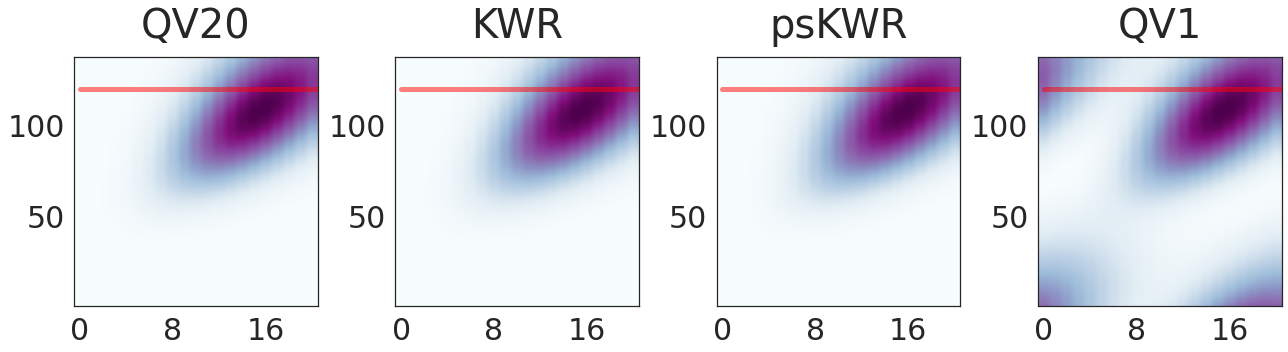

In [34]:
num_columns = 4
for index,i in enumerate([11]):
    
    p_ = data_array[i][0]
    
    mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p_[0],10**p_[1],10**p_[2])
    lim_large = [int(np.ceil(mu_n+20*std_n)),int(np.ceil(mu_m+20*std_m))]
    lim_ = [int(np.ceil(mu_n+.5*std_n)),int(np.ceil(mu_m+.5*std_m))]

    qv20_pmf = fitmodel_qv.eval_model_pss(p_,limits=lim_large)
    qv_pmf = fitmodel_qv.eval_model_pss(p_,limits=lim_)
    nas_range = np.arange(lim_[0])
    mat_range = np.arange(lim_[1])

    kwr_pmf = fitmodel_KWR.eval_model_pss(p_,lim_)
    psKWR_pmf = fitmodel_psKWR.eval_model_pss(p_,lim_)
    rw_pmf = ypm.get_prob(p_,nas_range,mat_range,rand_weights=True)
    dr_pmf = direct.predict_pmf(p_,lim_[0],lim_[1])
    N,M = np.meshgrid(range(lim_[0]),range(lim_[1]),indexing='ij')
    mmnb_pmf = ypm.approximate_conditional_tensorval(p_,N,M).detach().numpy()
    
    
    
    if index == 0:
        fig1,ax1=plt.subplots(nrows=1,ncols=num_columns,figsize=(4.5*num_columns,5))
        ax1[0].set_title('QV20',fontsize=40)
        ax1[1].set_title('KWR',fontsize=40)
        ax1[2].set_title('psKWR',fontsize=40)
        ax1[3].set_title('QV1',fontsize=40)
    
        
    else:
        fig1,ax1=plt.subplots(nrows=1,ncols=num_columns,figsize=(4.5*num_columns,4.5))
    
    # Create your ticker object with M ticks
    M = 3
    yticks = ticker.MaxNLocator(M)
    xticks = ticker.MaxNLocator(M)

    
    for i in range(num_columns):
        # set axis ticks
        ax1[i].yaxis.set_major_locator(yticks)
        ax1[i].xaxis.set_major_locator(xticks)


    
        # hide the 0 value
        ax1[i].yaxis.get_major_ticks()[1].label1.set_visible(False)



    ax1[0].imshow(qv20_pmf[:lim_[0],:lim_[1]],aspect='auto',cmap=cmap)
    ax1[0].invert_yaxis()


#     hell = tools.hellinger(pdf,predicted)
    ax1[1].imshow(kwr_pmf[:lim_[0],:lim_[1]],aspect='auto',cmap=cmap)
    ax1[1].invert_yaxis()
    
#     hell = tools.hellinger(pdf,nnNB)
    ax1[2].imshow(psKWR_pmf[:lim_[0],:lim_[1]],aspect='auto',cmap=cmap)
    ax1[2].invert_yaxis()
    
    ax1[3].imshow(qv_pmf[:lim_[0],:lim_[1]],aspect='auto',cmap=cmap)
    ax1[3].invert_yaxis()

    plt.tight_layout()
    
    desired_conditionals = [120]
    for i in range(len(desired_conditionals)):
        ax1[0].plot([0,lim_[1]-0.5],[desired_conditionals[i]]*2,alpha=0.5,linewidth=5,color='red')
        ax1[1].plot([0,lim_[1]-0.5],[desired_conditionals[i]]*2,alpha=0.5,linewidth=5,color='red')
        ax1[2].plot([0,lim_[1]-0.5],[desired_conditionals[i]]*2,alpha=0.5,linewidth=5,color='red')
        ax1[3].plot([0,lim_[1]-0.5],[desired_conditionals[i]]*2,alpha=0.5,linewidth=5,color='red')
    plt.savefig('./pmf_zoom{:.0f}.png'.format(index),dpi=450,transparent=True)

120


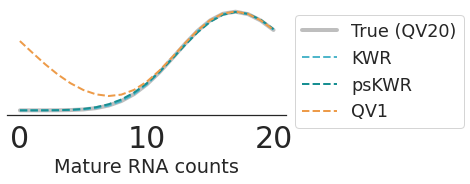

In [35]:
i=0
# lw=
m_ = qv_pmf.shape[1]
desired_conditionals = [120]
for cond in desired_conditionals:
    print(cond)
    fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,2))
    plt.plot(qv20_pmf[cond,:m_],'gray',label='True (QV20)',linewidth=4.0,alpha=0.5)
    plt.plot(kwr_pmf[cond,:m_],'--',label='KWR',linewidth=2.0,color=color_dict['KWR'])
    plt.plot(psKWR_pmf[cond,:m_],'--',label='psKWR',linewidth=2.0,color=color_dict['psKWR'])
    plt.plot(qv_pmf[cond,:m_],'--',label='QV1',linewidth=2.0,color=color_dict['QV1'])
#     plt.plot(pred[cond,:],color='crimson',label='Approximated PMF',linewidth=2,linestyle='--')
#     ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    plt.xlabel('Mature RNA counts')
    if cond==120:
        ax1.legend(bbox_to_anchor=[1.0,1.0])
    # plt.xlabel('# mature RNA')
    # plt.ylabel('Probability')
    plt.savefig('./cond_zoom{:.0f}.png'.format(i),dpi=450,bbox_inches="tight")
    i+=1
    # # plt.title(f'P (m | n = {cond})',fontsize=20)
    # plt.legend()

-----

# Figure 3


### Figure 3a: Training/validation loss for final model

In [40]:
best_model_loss = np.load('../models/best_model_meta.npy',allow_pickle=True)

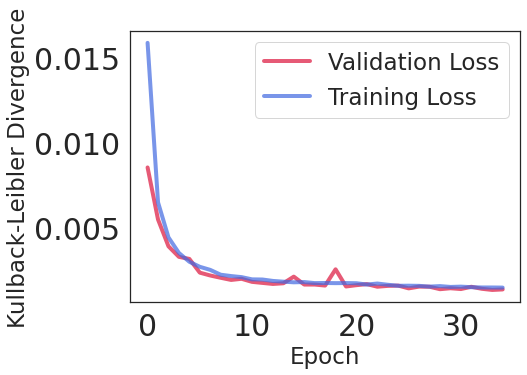

In [43]:
fig = plt.figure(figsize=(7,5))

best_model_loss = np.load('../models/best_model_meta.npy',allow_pickle=True)
train_klds = best_model_loss[2]
valid_klds = best_model_loss[3]

lw=4
alpha=0.7

plt.plot(valid_klds,label='Validation Loss',c='crimson',linewidth=lw,alpha=alpha)
plt.plot(train_klds,label='Training Loss',c='royalblue',linewidth=lw,alpha=alpha)
plt.legend(fontsize=fs)
# plt.title('Training and Validation Loss, Final Model',fontsize=fs)
plt.ylabel('Kullback-Leibler Divergence',fontsize=fs)
plt.xlabel('Epoch',fontsize=fs);
plt.savefig('./kld_epoch.png',dpi=450)

### Figure 3b: Timing for training 

Training time for a varying number of *conditional examples* with 5, 10, or 20 kernel functions. 

In [44]:
times_5npdf = np.load('../results/timing_5npdf.npy')
times_10npdf = np.load('../results/timing_10npdf.npy')
times_20npdf = np.load('../results/timing_20npdf.npy')

In [45]:
num_conditionals = times_5npdf[0,:]
slope5, intercept5, r, p, se = scipy.stats.linregress(np.log10(num_conditionals), np.log10(times_5npdf[1,:]))
slope10, intercept10, r, p, se = scipy.stats.linregress(np.log10(num_conditionals), np.log10(times_10npdf[1,:]))
slope20, intercept20, r, p, se = scipy.stats.linregress(np.log10(num_conditionals), np.log10(times_20npdf[1,:]))

In [46]:
print(slope5,slope10,slope20)

0.9092209786955752 0.8636967104815387 0.8593145178250395


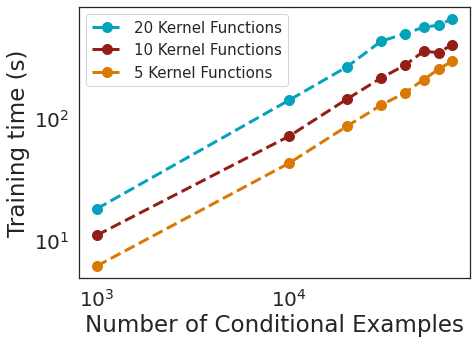

In [80]:
fig = plt.figure(figsize=(7,5))
num_conditionals = times_5npdf[0,:]
# col = ("#a40000", "#16317d", "#007e2f", "#ffcd12", "#b86092", "#721b3e", "#00b7a7")
col=("#04a3bd", "#f0be3d", "#931e18", "#da7901", "#247d3f", "#20235b")
lw=3
markersize=10
plt.plot(num_conditionals,times_20npdf[1,:],label='20 Kernel Functions',c=col[0],marker='o',linestyle='--',linewidth=lw,markersize=markersize)
plt.plot(num_conditionals,times_10npdf[1,:],label='10 Kernel Functions',c=col[2],marker='o',linestyle='--',linewidth=lw,markersize=markersize)
plt.plot(num_conditionals,times_5npdf[1,:],label='5 Kernel Functions',c=col[3],marker='o',linestyle='--',linewidth=lw,markersize=markersize)



#plt.plot(num_conditionals,num_conditionals*slope+intercept,label='Fitting num_cond vs. time for 10',c='lightgray',marker='o',linestyle='--',linewidth=lw,markersize=markersize)

# plt.title('Training Time vs. Number of Conditional Examples (1 Epoch)')
plt.xlabel('Number of Conditional Examples',fontsize=fs)
plt.ylabel('Training time (s)',fontsize=fs)
plt.legend(fontsize=15,loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('./time_numex.png',dpi=450)

### Figure 3c-e: Varying Nodes, Kernel Functions, Examples
Plot the 5th, 95th percentile and mean Kullback-Leibler divergence for the testing parameters (stored in ./data/256_test_i.npy) as a function of changing the number of hidden nodes in the two hidden layers, the number of kernel functions, and the number of training parameters. 

In [67]:
klds_hid = np.load('../results/testing_klds_hid.npy',allow_pickle=True)
klds_npdf = np.load('../results/testing_klds_npdf.npy',allow_pickle=True)
klds_param = np.load('../results/testing_klds_param.npy',allow_pickle=True)

In [68]:
# get mean and quantiles for best model 
main_mean = np.mean(klds_param[-1,1])
main_95th = np.percentile(klds_param[-1,1],95)
main_5th = np.percentile(klds_param[-1,1],5)

### Figure 3c: Varying Nodes in Hidden Layers

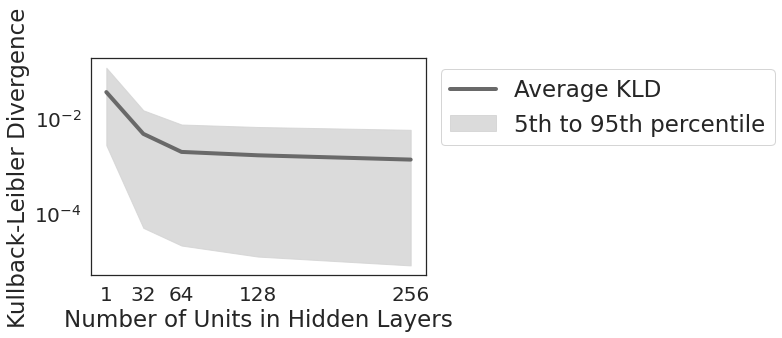

In [81]:
plt.rcParams.update({'font.size': 15,'font.family': 'Arial'})
hid_95th = [ np.percentile(hid[1],95) for hid in klds_hid ] 
hid_5th = [ np.percentile(hid[1],5) for hid in klds_hid ] 
hid_means =  [ np.mean(hid[1]) for hid in klds_hid ] 


# add for best model
hid_units = [hid[0] for hid in klds_hid]
hid_units.append(256)
hid_means.append(main_mean)
hid_95th.append(main_95th)
hid_5th.append(main_5th)


lw=4
fig, ax = plt.subplots()
ax.plot(hid_units[:], hid_means[:], '-',label='Average KLD',color='dimgray',linewidth=lw)
ax.fill_between(hid_units[:], hid_95th[:], hid_5th[:], alpha=0.8, label = '5th to 95th percentile',color='lightgray')
# plt.title('KLD vs. Number of Units in Hidden Layers')
plt.ylabel('Kullback-Leibler Divergence',fontsize=fs)
plt.xlabel('Number of Units in Hidden Layers',fontsize=fs)
plt.xticks(hid_units[:], hid_units[:],fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=20)
plt.legend(fontsize=fs,bbox_to_anchor=(1.01,1.0))

#plt.savefig('./figs/kld_nunits.png',dpi=450)

### Figure 3d: Varying Number of Kernel Functions

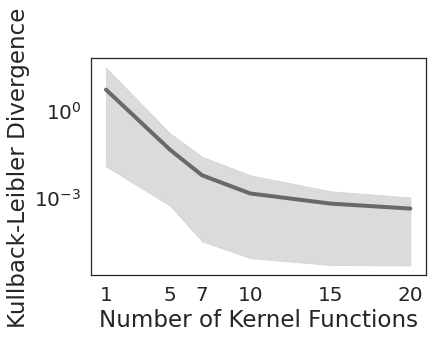

In [82]:
npdf = [ p[0] for p in klds_npdf]
npdf.insert(3,10)

npdf_95th = [ np.percentile(p[1],95) for p in klds_npdf ] 
npdf_95th.insert(3,main_95th)
npdf_5th = [ np.percentile(p[1],5) for p in klds_npdf] 
npdf_5th.insert(3,main_5th)
npdf_means =  [ np.mean(p[1]) for p in klds_npdf ] 
npdf_means.insert(3,main_mean)

npdf = [ p[0] for p in klds_npdf]
npdf.insert(3,10)


fig, ax = plt.subplots()
ax.plot(npdf[:], npdf_means[:], '-',label='Average KLD',color='dimgray',linewidth=lw)
ax.fill_between(npdf[:], npdf_95th[:], npdf_5th[:], alpha=0.8, label = '5th to 95th percentile',color='lightgray')
# plt.title('KLD vs. Number of Basis Functions')
plt.ylabel('Kullback-Leibler Divergence',fontsize=fs)
plt.xlabel('Number of Kernel Functions',fontsize=fs)
plt.xticks(npdf[:], npdf[:],fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
# plt.legend(fontsize=fs)

# plt.savefig('./kld_nkernels.png',dpi=450)

### Figure 3e: Varying Number of Example Rate Vectors

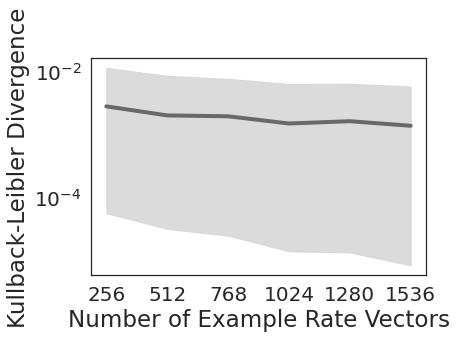

In [83]:
param_95th = [ np.percentile(p[1],95) for p in klds_param ] 
param_5th = [ np.percentile(p[1],5) for p in klds_param ] 
param_means =  [ np.mean(p[1]) for p in klds_param ] 


params = 256*(np.arange(6)+1)

fig, ax = plt.subplots()
ax.plot(params[:], param_means[:], '-',label='Average KLD',color='dimgray',linewidth=lw)
ax.fill_between(params[:], param_95th[:], param_5th[:], alpha=0.8, label = '5th to 95th percentile',color='lightgray')
# plt.title('KLD vs. Number of Examples')
plt.ylabel('Kullback-Leibler Divergence',fontsize=fs)
plt.xlabel('Number of Example Rate Vectors',fontsize=fs)
plt.xticks(params[:], params[:],fontsize=20)
plt.yticks(fontsize=20)
#plt.ylim(-0.001,0.02)
plt.yscale('log')
# plt.legend(fontsize=fs)

plt.savefig('./kld_numex.png',dpi=450)


# Supplementary Tables and Figures


### Table 1: Model parameters

Parameters for final kernel weight regression models.

In [85]:
ypm.model

MLP(
  (input): Linear(in_features=7, out_features=256, bias=True)
  (hidden): Linear(in_features=256, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (hyp): Linear(in_features=256, out_features=1, bias=True)
  (softmax): Softmax(dim=1)
)

### Table 2: DR Model Params

Parameters for final direct regression model.


In [87]:
direct.model_direct

MLP(
  (module_list): ModuleList(
    (0): Linear(in_features=5, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=1, bias=True)
  )
)

### Table 3: nnNB Model Params

In [90]:
from monod import nn_toolbox

In [91]:
nn_toolbox.model_microstate3

MLP_weights_scale(
  (module_list): ModuleList(
    (0): Linear(in_features=10, out_features=256, bias=False)
    (1): Linear(in_features=256, out_features=256, bias=False)
    (2): Linear(in_features=256, out_features=3, bias=True)
  )
  (scaling_mean): Linear(in_features=256, out_features=3, bias=True)
  (scaling_std): Linear(in_features=256, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

### S2: Direct Regression Hellinger Distances

Comparing varying number of hidden nodes and layers in direct regression. 

In [92]:
test_hellinger_nodes_d = np.load('../results/testing_hellinger_direct_vary_nodes.npy',allow_pickle=True)
test_hellinger_layers_d = np.load('../results/testing_hellinger_direct_vary_layers.npy',allow_pickle=True)

In [93]:
# Calculate percentiles for hellinger distances for changing number of nodes

nodes = [128,256,512,1024,3000]

nodes_95th = [ np.percentile(h,95) for h in test_hellinger_nodes_d ] 
nodes_5th = [ np.percentile(h,5) for h in test_hellinger_nodes_d ] 
nodes_means =  [ np.mean(h) for h in test_hellinger_nodes_d ] 

layers = [2,3,4,5]

# Calculate percentiles for hellinger distances for changing number of layers
layers_95th = [ np.percentile(h,95) for h in test_hellinger_layers_d ] 
layers_5th = [ np.percentile(h,5) for h in test_hellinger_layers_d ] 
layers_means =  [ np.mean(h) for h in test_hellinger_layers_d ] 

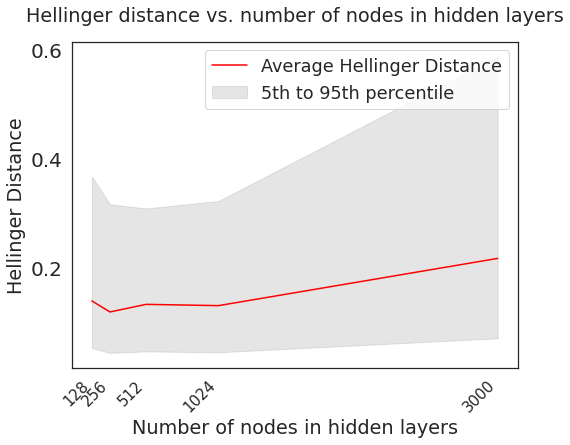

In [106]:
# and plot
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(nodes, nodes_means, '-',label='Average Hellinger Distance',c='red')
ax.fill_between(nodes, nodes_95th, nodes_5th, alpha=0.2, label = '5th to 95th percentile',color='gray')
plt.title('Hellinger distance vs. number of nodes in hidden layers')
plt.ylabel('Hellinger Distance')
plt.xlabel('Number of nodes in hidden layers')
plt.xticks(nodes[:], nodes[:],fontsize=15,rotation=45,ha='right')
plt.yticks(fontsize=20)
plt.legend();
plt.savefig('./direct_vary_nodes.png',dpi=450)

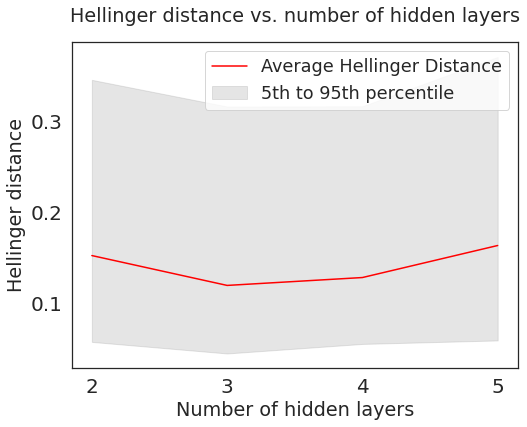

In [98]:
# and plot
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(layers, layers_means, '-',label='Average Hellinger Distance',c='red')
ax.fill_between(layers, layers_95th, layers_5th, alpha=0.2, label = '5th to 95th percentile',color='gray')
plt.title('Hellinger distance vs. number of hidden layers')
plt.ylabel('Hellinger distance')
plt.xlabel('Number of hidden layers')
plt.xticks(layers[:], layers[:],fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.savefig('./direct_vary_layers.png',dpi=450);